In [5]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
with open("S10_af.pkl", "rb") as f:
    data = pickle.load(f)

afs = data["afs"]
metas = data["metas"]

In [8]:
afs

,Time,Mz,Fz,Fy,Fx,sample_no
0,0.00,0.297328,0.044294,0.006714,0.004425,1
1,0.01,0.061471,0.029864,0.000741,-0.000011,1
2,0.02,0.296021,0.044425,0.006616,0.004381,1
3,0.03,0.061907,0.029253,0.000708,0.000011,1
4,0.04,0.301252,0.043509,0.006801,0.004469,1
...,...,...,...,...,...,...
972049,179.96,12.385800,0.244707,-0.010027,-0.015117,9
972050,179.97,12.677900,0.262844,-0.002616,-0.009668,9
972051,179.98,12.389700,0.245361,-0.010005,-0.015063,9
972052,179.99,12.678700,0.263192,-0.002638,-0.009635,9


<Axes: title={'center': 'Axial Force over Time - Post Welding Sample 1'}, xlabel='Time (s)', ylabel='Axial Force (kN)'>

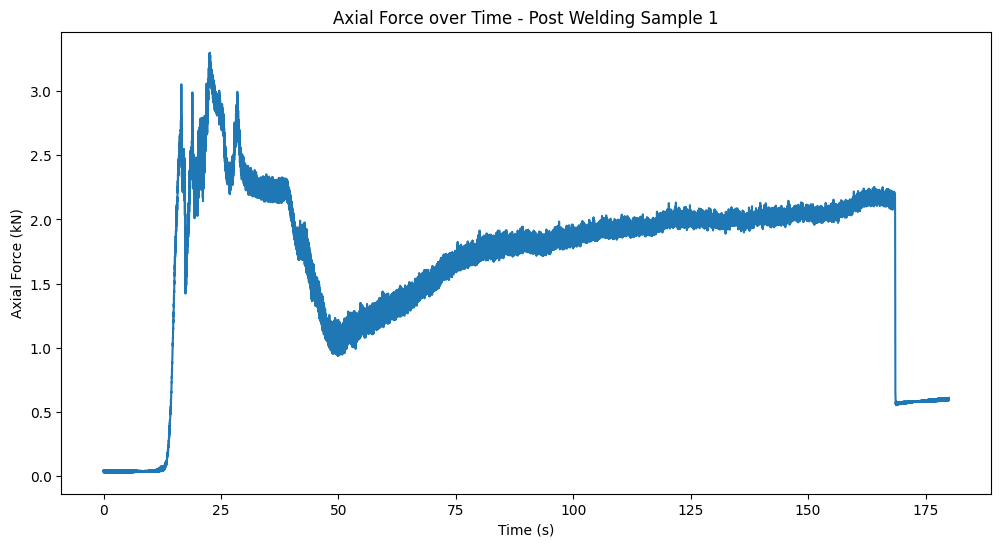

In [14]:
sample_no = 1

af = afs.loc[afs["sample_no"] == sample_no]

af.set_index("Time", inplace=True)

af["Fz"].plot(
    figsize=(12, 6),
    title="Axial Force over Time - Post Welding Sample 1",
    ylabel="Axial Force (kN)",
    xlabel="Time (s)",
)

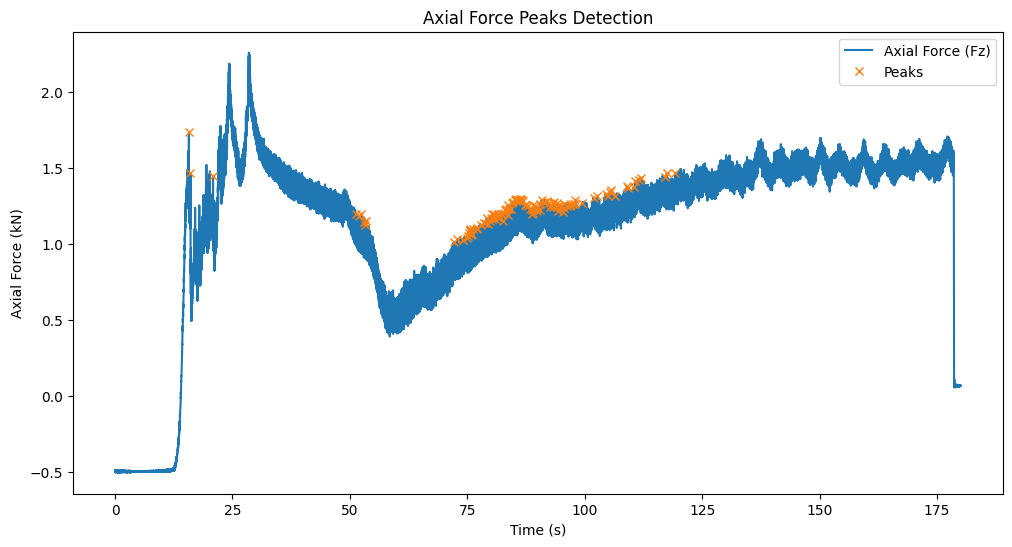

In [ ]:
from scipy.signal import find_peaks  # pip install scipy

fpeaks, props = find_peaks(af["Fz"], height=(1, None), threshold=0.15, rel_height=3)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(af.index, af["Fz"], label="Axial Force (Fz)")
ax.set_title("Axial Force Peaks Detection")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Axial Force (kN)")
ax.plot(af.index[fpeaks], af["Fz"].iloc[fpeaks], "x", label="Peaks")
ax.legend()
# ax.set_xlim([14, 18])

<Axes: xlabel='Time'>

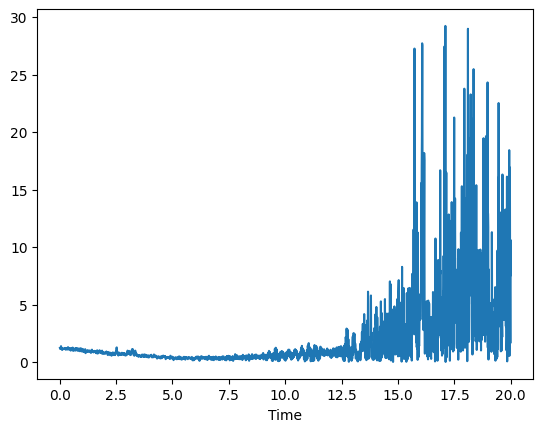

In [ ]:
# Track the first data steep slope during the first few seconds
idxes = af.index[af.index <= 20]
# Plot the slope with time diff
slope = af["Fz"].loc[idxes].diff().abs() / af.index.to_series().diff()
slope.plot()


First steep slope at time 13.67 s with Fz = -0.168762 kN


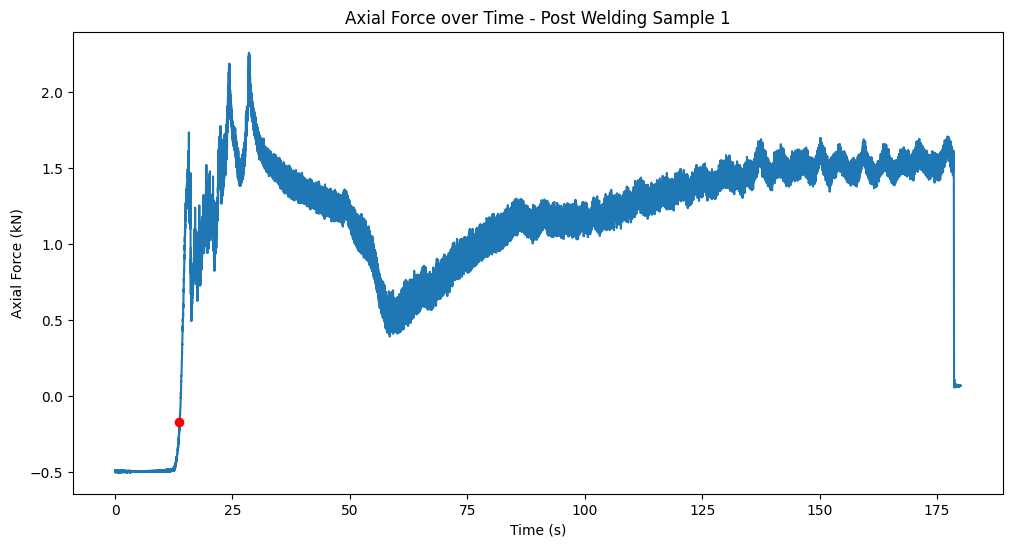

In [ ]:
# Identify the first point where slope exceed a threshold

threshold = 5  # Define a threshold for steep slope
locs_steep = slope[slope > threshold]
locs_steep_idx = locs_steep.index[0]
locs_steep_value = af.loc[locs_steep_idx, "Fz"]
print(f"First steep slope at time {locs_steep_idx} s with Fz = {locs_steep_value} kN")

# Mark the max slope point on the original plot
ax = af["Fz"].plot(
    figsize=(12, 6),
    title="Axial Force over Time - Post Welding Sample 1",
    ylabel="Axial Force (kN)",
    xlabel="Time (s)",
)
ax.plot(
    locs_steep_idx,
    locs_steep_value,
    "ro",  # red dot
)

<Axes: xlabel='Time'>

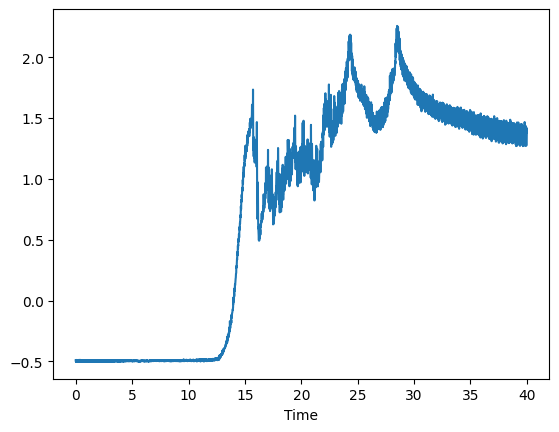

In [ ]:
af[af.index < 40]["Fz"].plot()